# Wine Quality Prediction



## Group 9
1. Saif Mohammed (101521571)
2. Tarunsai Gangaram Chukkala (101543772)
3. Hari Vignesh Duraipandi (101567616)
4. Namira Ganam  (101561548)
5. Jefin George (101568007)
6. Manyue Javvadi (101557000)
7. Dinesh Kesavan (101562524)
8. Srivatsan Rangarajan (101571286)
9. Aswin Senthil Kumar (101565080)
10. Mahender Reddy Thota (101550698)
11. Yeshamina Kamal (101556854)
12. Dev Arya (101565399)

## Description
The dataset is related to red wine quality. It includes various physicochemical properties of the wine, such as acidity, sugar content, sulfur dioxide levels, density, pH, and alcohol content. The target variable is quality, which is an integer score between 0 and 10 indicating the quality of the wine. This dataset can be used for regression or classification tasks to predict wine quality based on its physicochemical properties.

## Features in the Wine Quality Dataset

The dataset contains the following features:

1. **fixed acidity**: Measures the amount of non-volatile acids in the wine. These acids do not evaporate easily and contribute to the wine's taste.
2. **volatile acidity**: Measures the amount of volatile acids in the wine. High levels can lead to an unpleasant vinegar taste.
3. **citric acid**: A natural preservative that can add freshness and flavor to wines.
4. **residual sugar**: The amount of sugar remaining after fermentation stops. Wines with higher residual sugar tend to be sweeter.
5. **chlorides**: Measures the amount of salt in the wine.
6. **free sulfur dioxide**: The amount of SO2 that is not bound to other molecules in the wine and can act as an antimicrobial and antioxidant.
7. **total sulfur dioxide**: The total amount of SO2 in the wine, including both free and bound forms.
8. **density**: The density of the wine, which can be influenced by the alcohol and sugar content.
9. **pH**: Describes how acidic or basic the wine is. A lower pH indicates higher acidity.
10. **sulphates**: A wine additive that can contribute to sulfur dioxide levels and acts as an antimicrobial and antioxidant.
11. **alcohol**: The alcohol content of the wine.
12. **quality**: A score between 0 and 10 given by wine experts based on the sensory data. For the purpose of this analysis, the quality has been converted to binary values where 0 indicates poor quality and 1 indicates good quality.

## Data Preprocessing

Importing required libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading dataset

In [2]:
#data = pd.read_csv(r'https://raw.githubusercontent.com/mahenderthota/wine-quality/refs/heads/eda/uncleaned-winequality-red.csv')
data = pd.read_csv(r'uncleaned-winequality-red.csv')

# Display the first few rows of the dataset to get an overview
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,-10.0,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,NaN,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,100.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,NaN,3.51,0.56,9.4,0


In [3]:
# To get the number of rows and columns in the dataset
data.shape

(1600, 12)

In [4]:
# To get the column names
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1600 non-null   float64
 1   volatile acidity      1600 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1600 non-null   float64
 4   chlorides             1600 non-null   float64
 5   free sulfur dioxide   1600 non-null   float64
 6   total sulfur dioxide  1600 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1600 non-null   float64
 9   sulphates             1600 non-null   float64
 10  alcohol               1600 non-null   float64
 11  quality               1600 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.1 KB


In [6]:
# Display summary statistics of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1600.000000,1600.000000,1599.000000,1600.000000,1600.000000,1600.000000,1600.000000,1599.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,8.307938,0.527928,0.270951,2.538406,0.087459,15.871875,46.460000,0.996747,3.311238,0.658088,10.478719,0.535000
std,1.799897,0.179055,0.194833,1.409578,0.047051,10.457596,32.886514,0.001887,0.154418,0.169472,2.480001,0.498929
min,-10.000000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,100.000000,1.000000


In [7]:
# Check for unique values in each column
unique_values = data.nunique()
print("Unique values in each column:\n", unique_values)


Unique values in each column:
 fixed acidity            97
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  66
quality                   2
dtype: int64


In [8]:
# Display the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.260082,0.658299,0.110860,0.089306,-0.153963,-0.113187,0.645897,-0.656073,0.176338,0.012615,0.098267
volatile acidity,-0.260082,1.000000,-0.552410,0.001645,0.061132,-0.010780,0.076217,0.022026,0.235522,-0.261232,-0.118615,-0.320980
citric acid,0.658299,-0.552410,1.000000,0.143814,0.204069,-0.060621,0.036026,0.365210,-0.542918,0.313154,0.081134,0.157510
residual sugar,0.110860,0.001645,0.143814,1.000000,0.055674,0.187156,0.203113,0.355283,-0.085967,0.005690,0.007888,-0.002513
chlorides,0.089306,0.061132,0.204069,0.055674,1.000000,0.005633,0.047455,0.200632,-0.265080,0.371303,-0.100954,-0.109631
free sulfur dioxide,-0.153963,-0.010780,-0.060621,0.187156,0.005633,1.000000,0.667702,-0.021946,0.069961,0.051817,-0.027240,-0.061768
total sulfur dioxide,-0.113187,0.076217,0.036026,0.203113,0.047455,0.667702,1.000000,0.071269,-0.066762,0.043078,-0.078876,-0.231882
density,0.645897,0.022026,0.365210,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.198046,-0.158424
pH,-0.656073,0.235522,-0.542918,-0.085967,-0.265080,0.069961,-0.066762,-0.341699,1.000000,-0.196991,0.065678,-0.002511
sulphates,0.176338,-0.261232,0.313154,0.005690,0.371303,0.051817,0.043078,0.148506,-0.196991,1.000000,0.029870,0.217652


Plotting the Correlation Matrix

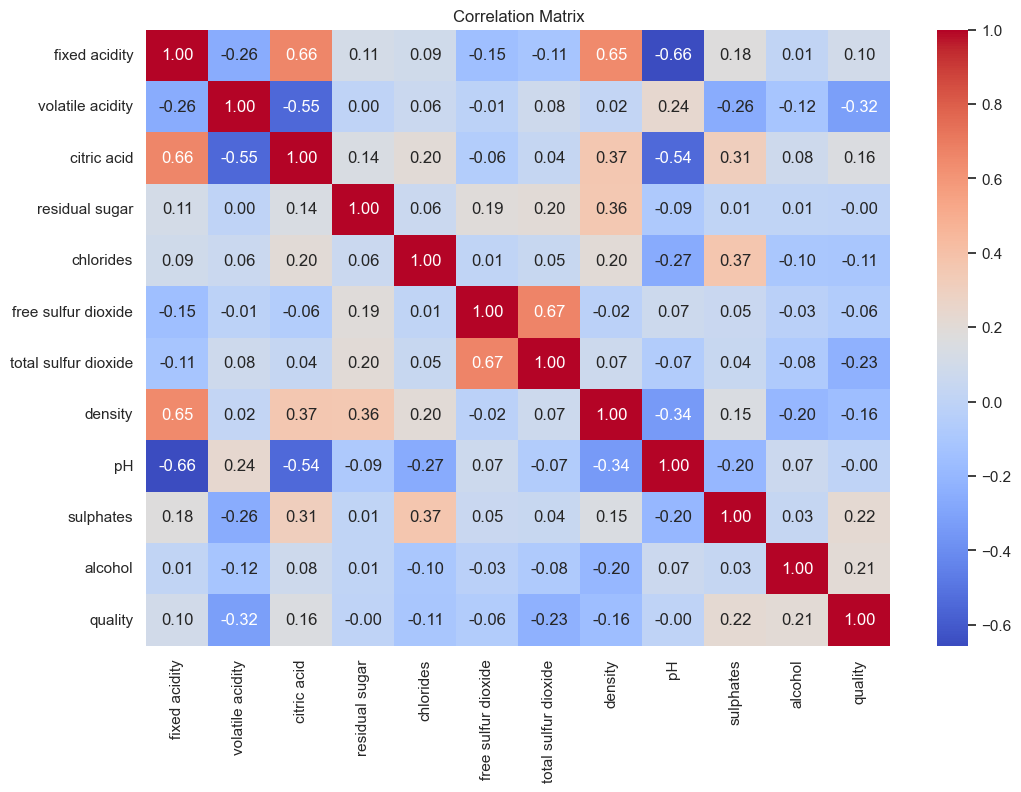

In [9]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Using Histogram and Boxplot to understand distribution of features and outliers in the data

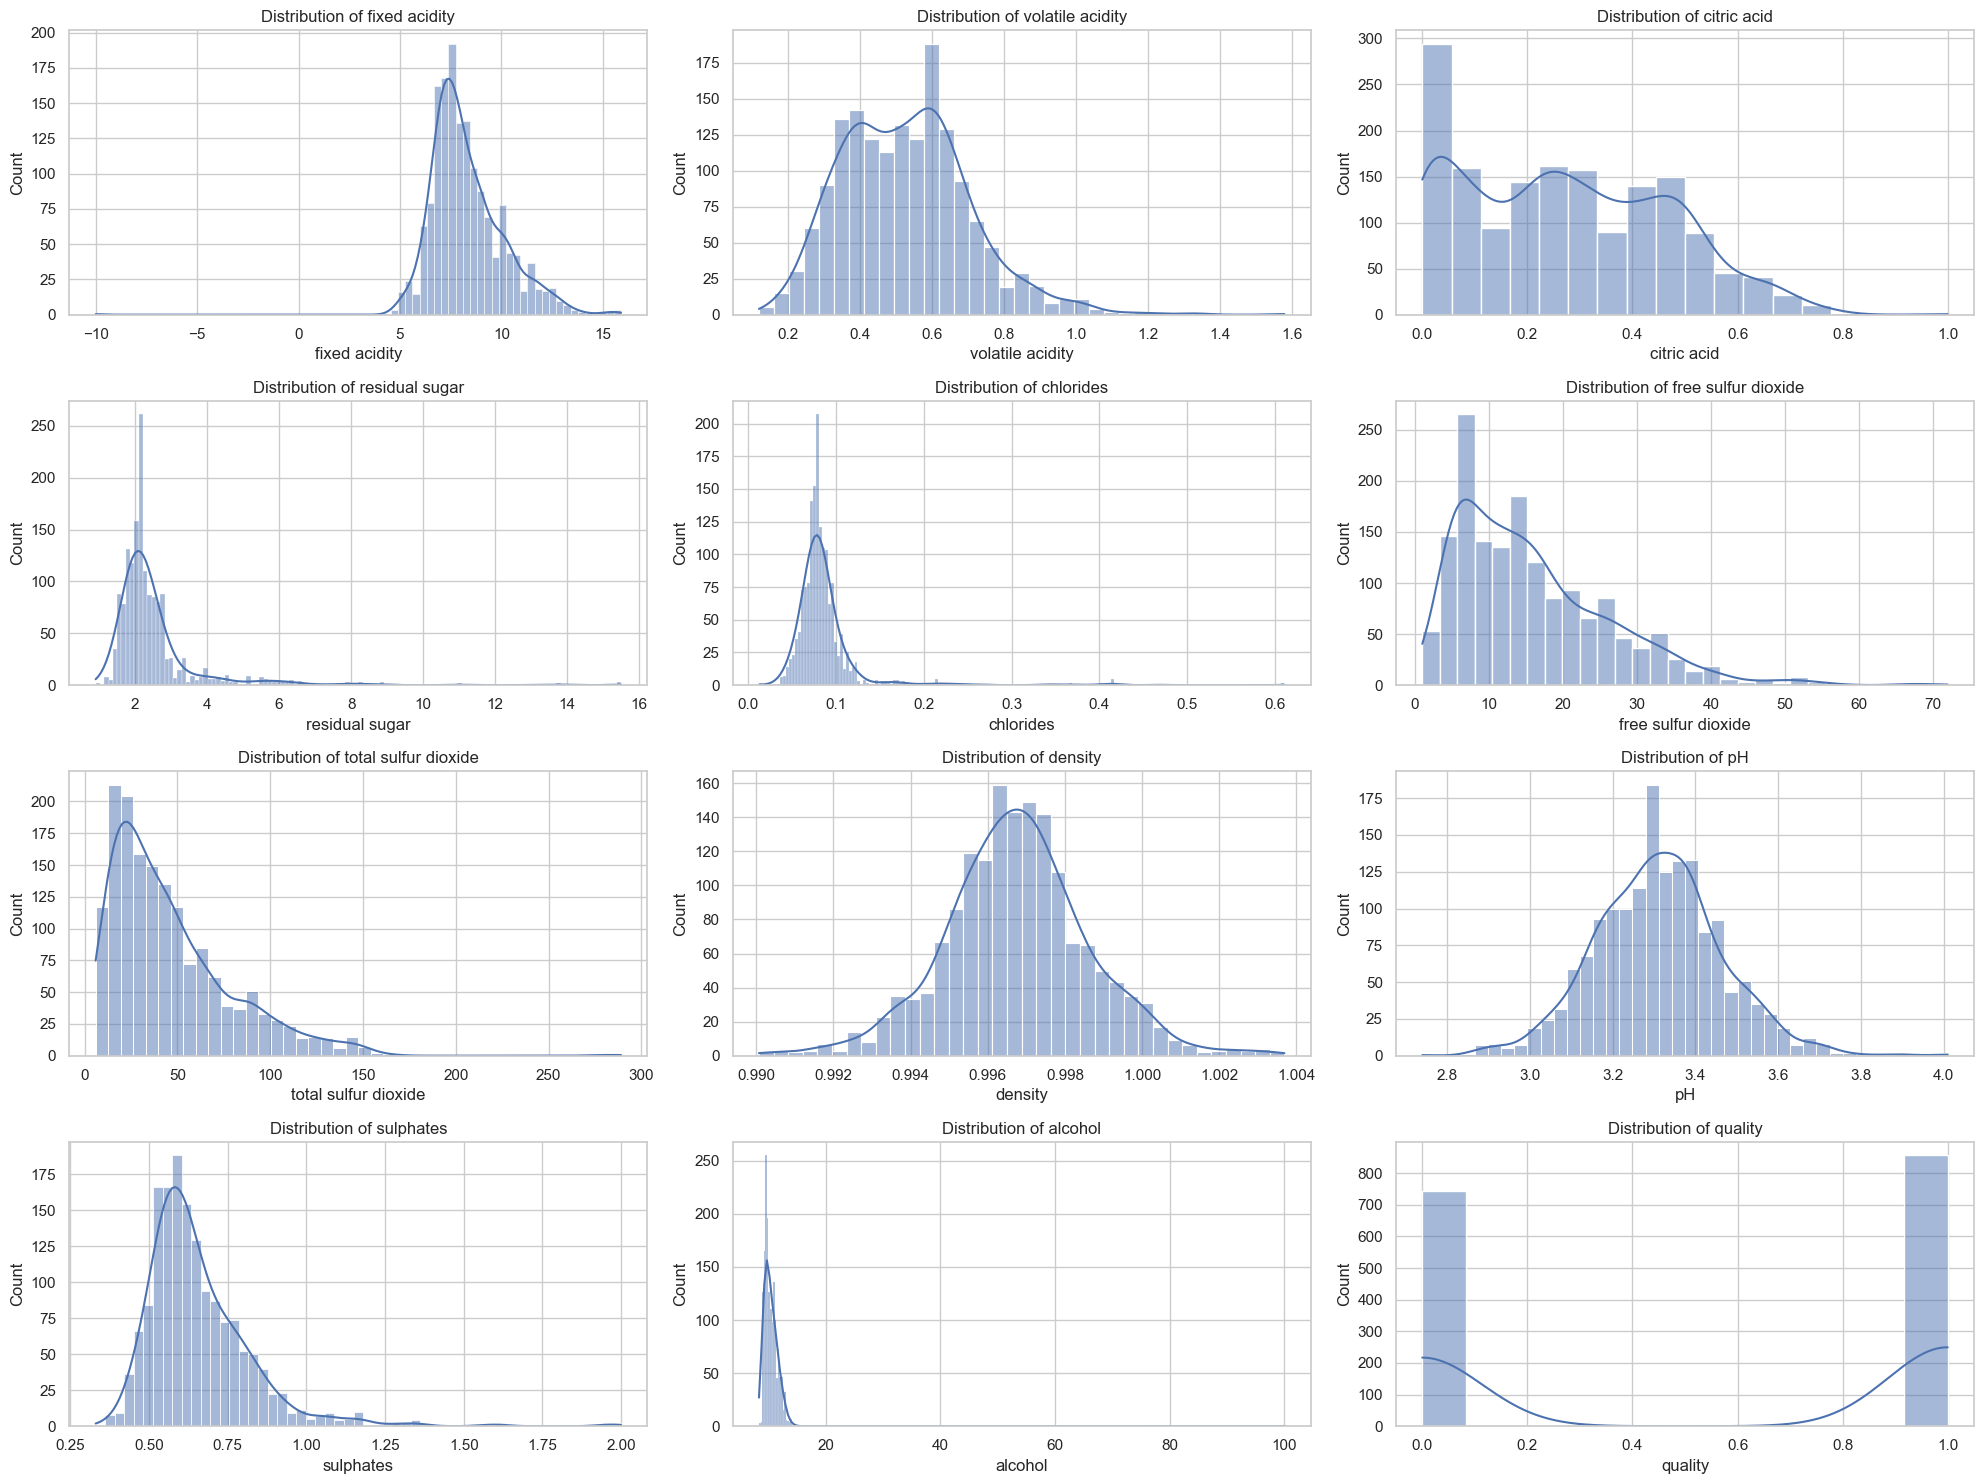

In [10]:
# Plot the distribution of each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

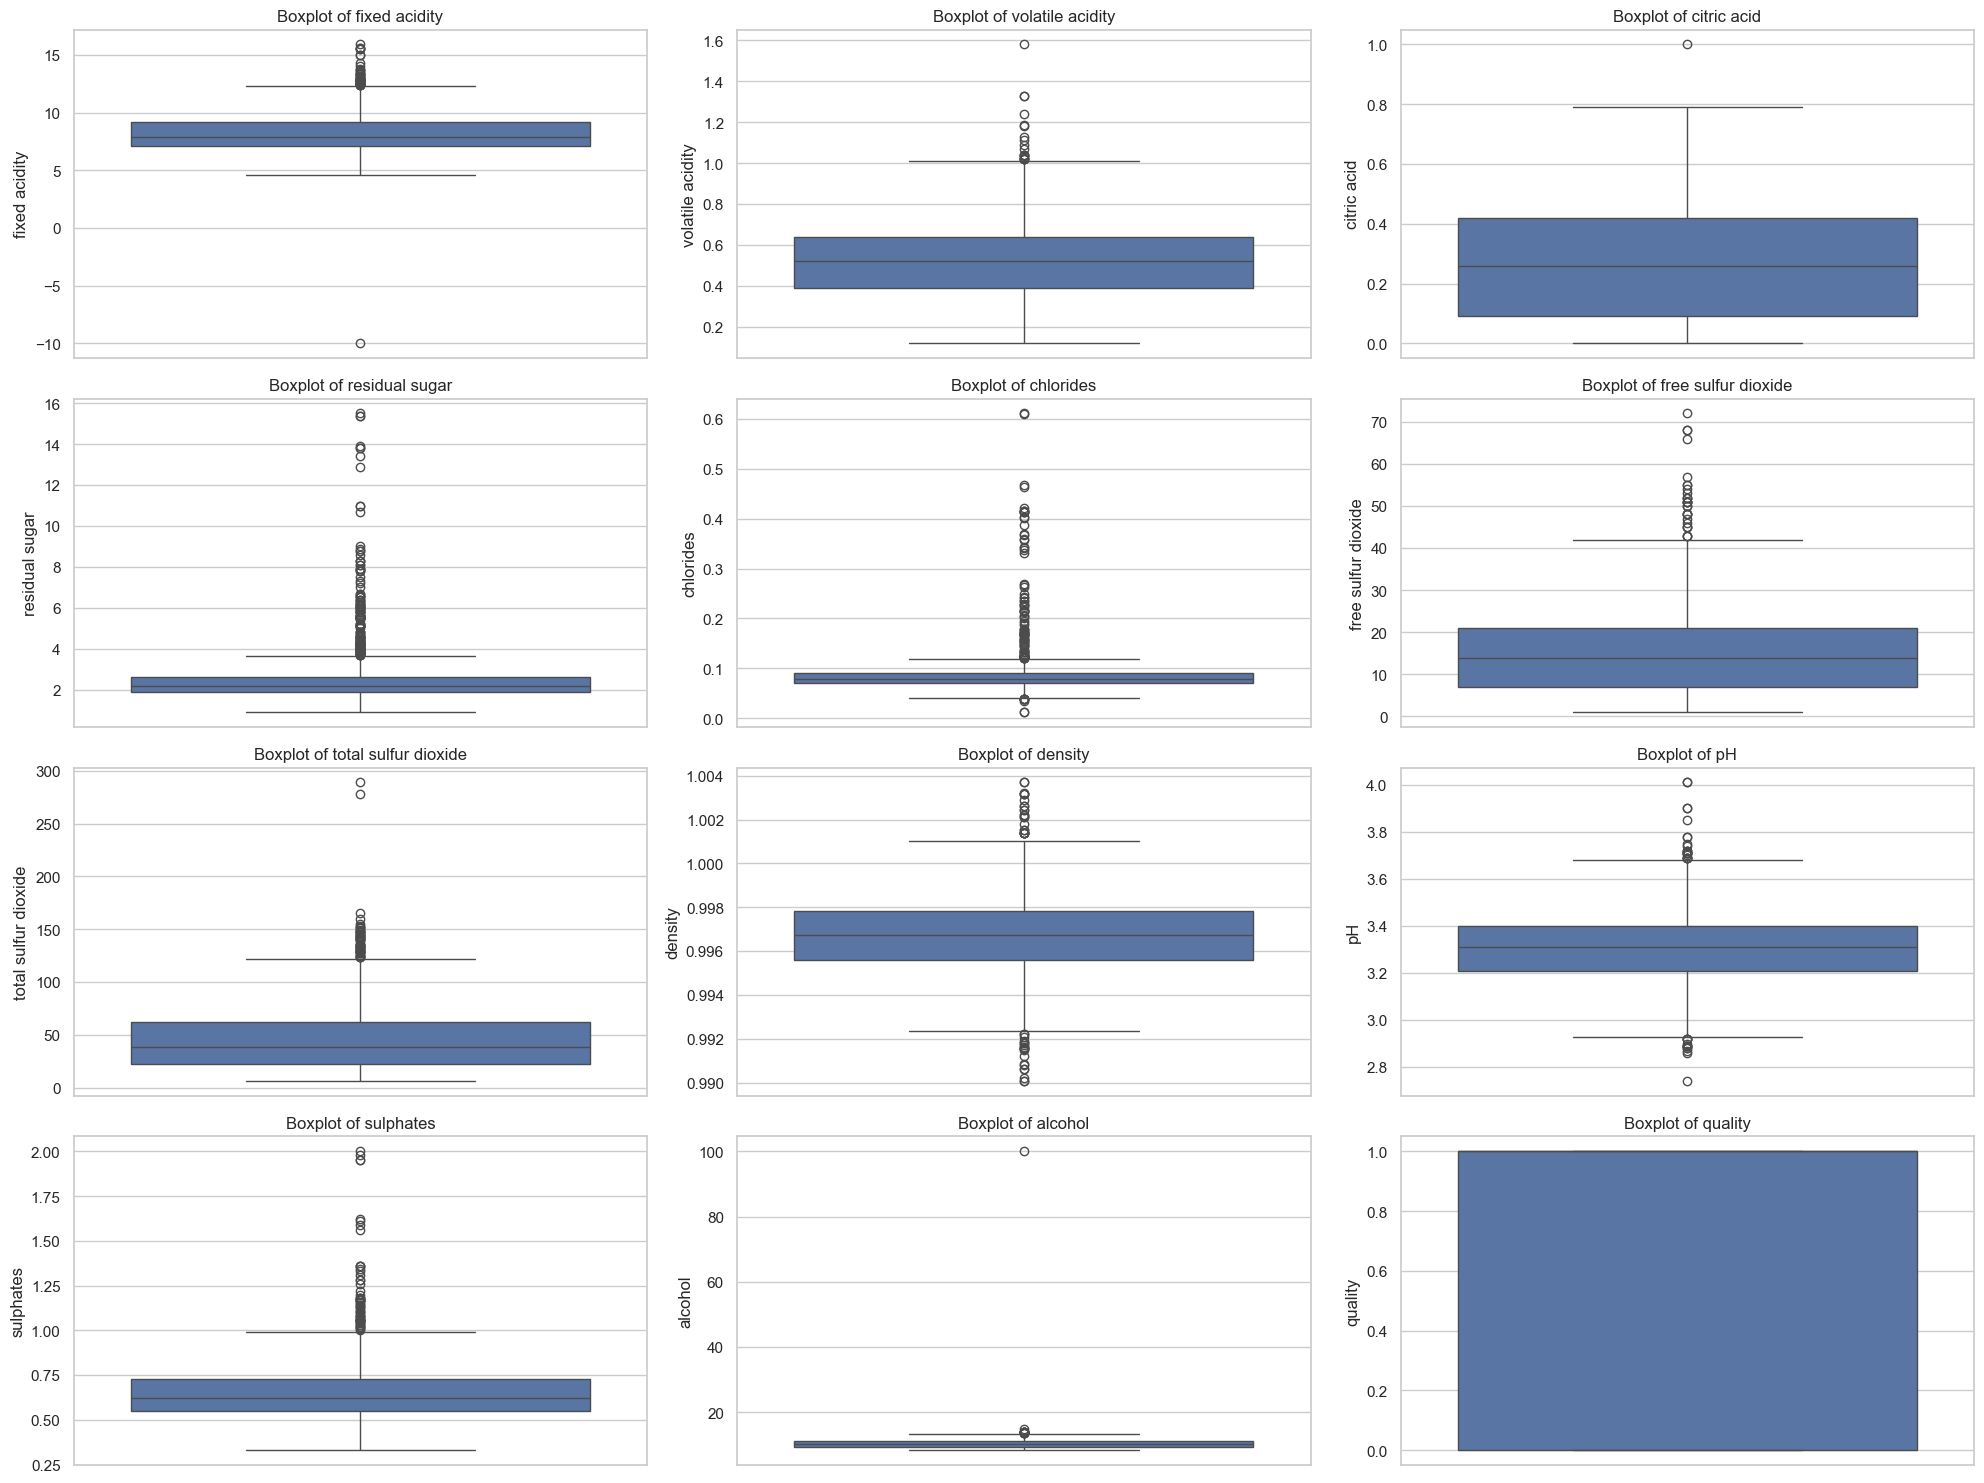

In [11]:
# Plot the boxplot for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [12]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 1
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
# From Summary Statistics, we can see that there are negative values in the dataset
# Step 1: Before imputing replace negative values with NaN
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].map(lambda x: x if x >= 0 else None)
data.isnull().sum()

fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 1
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
# Step 2: Impute missing values with the median for "fixed acidity", "citric acid" and "density"
data['fixed acidity'].fillna(data['fixed acidity'].median(), inplace=True)
data['citric acid'].fillna(data['citric acid'].median(), inplace=True)
data['density'].fillna(data['density'].median(), inplace=True)

In [15]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
# Handle outliers - Capping alcohol values at a reasonable upper bound (95th percentile)
data['alcohol'] = data['alcohol'].apply(lambda x: min(x, data['alcohol'].quantile(0.95)))

In [18]:
#Verify the cleaning by displaying summary statistics and missing values
cleaned_missing_values = data.isnull().sum()
cleaned_summary_stats = data.describe()

cleaned_missing_values, cleaned_summary_stats

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1600.000000       1600.000000  1600.000000     1600.000000   
 mean        8.319125          0.527928     0.270944        2.538406   
 std         1.740687          0.179055     0.194773        1.409578   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          c

In [19]:
# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned-winequality-red.csv', index=False)

In [20]:
wine_df = data
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.9,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.26,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,12.5,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99675,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [25]:
# Set features (X) and target (y)
X = wine_df.drop(columns='quality')
y = wine_df['quality']

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

In [29]:
# Fit the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

In [34]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.771875
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       138
           1       0.82      0.77      0.79       182

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320



### Using *GridSearchCV* to find the best Decision Tree parameters

In [35]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy of the best model: {accuracy:.2f}')
print('Classification Report of the best model:')
print(report)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score: 0.75234375
Accuracy of the best model: 0.73
Classification Report of the best model:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       138
           1       0.80      0.70      0.75       182

    accuracy                           0.73       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.73      0.73       320



### Removing random features from the dataset to see if it improves the model.

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score


X = data.drop('quality', axis=1)  # Features
y = data['quality']                # Target

# Initial split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'SGDClassifier': SGDClassifier(random_state=42),
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        results[name] = {'accuracy': accuracy, 'precision': precision}
        print(f"{name} Accuracy: {accuracy:.2f}")
        print(f"{name} Precision: {precision:.2f}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
    
    return results

# Initial evaluation
print("Initial Model Evaluation:")
initial_results = evaluate_models(X_train, X_test, y_train, y_test)


# Randomly remove features (for example, removing 2 random features)
features_to_remove = np.random.choice(X.columns, size=2, replace=False)
X_reduced = X.drop(columns=features_to_remove)

# Split the new dataset
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Evaluate models on reduced features
print("\nModel Evaluation After Feature Removal:")
reduced_results = evaluate_models(X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced)

# Document observations
print("\nObservations:")
for model in initial_results:
    initial_accuracy = initial_results[model]['accuracy']
    initial_precision = initial_results[model]['precision']
    reduced_accuracy = reduced_results[model]['accuracy']
    print(f"{model}: Initial Accuracy = {initial_accuracy:.2f}, Reduced Accuracy = {reduced_accuracy:.2f}")

Initial Model Evaluation:
Decision Tree Accuracy: 0.77
Decision Tree Precision: 0.78
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       138
           1       0.82      0.77      0.79       182

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320

[[107  31]
 [ 42 140]]
SGDClassifier Accuracy: 0.57
SGDClassifier Precision: 0.61
              precision    recall  f1-score   support

           0       0.67      0.01      0.03       138
           1       0.57      0.99      0.73       182

    accuracy                           0.57       320
   macro avg       0.62      0.50      0.38       320
weighted avg       0.61      0.57      0.42       320

[[  2 136]
 [  1 181]]

Model Evaluation After Feature Removal:
Decision Tree Accuracy: 0.70
Decision Tree Precision: 0.71
              precision    recall  f1-score   support

 

## Stochastic Gradient Descent (SGD) Model for Predicting Wine Quality

In this section, we will build a Stochastic Gradient Descent (SGD) model to predict the quality of wine. SGD is an iterative method for optimizing an objective function with suitable smoothness properties.

In [53]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

# Initialize the SGD classifier
sgd_model = SGDClassifier(random_state=42)

# Fit the model on the training data
sgd_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_sgd = sgd_model.predict(X_test)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd, average='weighted')
report_sgd = classification_report(y_test, y_pred_sgd)

print(f'Accuracy of the SGD model: {accuracy_sgd:.2f}')
print(f'Precision of the SGD model: {precision_sgd:.2f}')
print('Classification Report of the SGD model:')
print(report_sgd)

# Compute the confusion matrix
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Print the confusion matrix
print("Confusion Matrix of the SGD model:")
print(conf_matrix_sgd)

Accuracy of the SGD model: 0.57
Precision of the SGD model: 0.61
Classification Report of the SGD model:
              precision    recall  f1-score   support

           0       0.67      0.01      0.03       138
           1       0.57      0.99      0.73       182

    accuracy                           0.57       320
   macro avg       0.62      0.50      0.38       320
weighted avg       0.61      0.57      0.42       320

Confusion Matrix of the SGD model:
[[  2 136]
 [  1 181]]


### Using *GridSearchCV* to improve the model

In [40]:
# Set up the parameter grid for GridSearchCV for the SGD model
param_grid_sgd = {
    'loss': ['squared_hinge', 'huber', 'squared_error', 'hinge', 'log_loss', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'perceptron', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Initialize GridSearchCV for the SGD model
grid_search_sgd = GridSearchCV(estimator=sgd_model, param_grid=param_grid_sgd, 
                               scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV for the SGD model
grid_search_sgd.fit(X_train, y_train)

# Best parameters and best score for the SGD model
print("Best Parameters for SGD:", grid_search_sgd.best_params_)
print("Best Cross-Validation Score for SGD:", grid_search_sgd.best_score_)

# Evaluate the best SGD model on the test set
best_sgd_model = grid_search_sgd.best_estimator_
y_pred_best_sgd = best_sgd_model.predict(X_test)

# Evaluate the best SGD model
accuracy_best_sgd = accuracy_score(y_test, y_pred_best_sgd)
report_best_sgd = classification_report(y_test, y_pred_best_sgd)

print(f'Accuracy of the best SGD model: {accuracy_best_sgd:.2f}')
print('Classification Report of the best SGD model:')
print(report_best_sgd)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters for SGD: {'alpha': 0.0001, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.001}
Best Cross-Validation Score for SGD: 0.72734375
Accuracy of the best SGD model: 0.60
Classification Report of the best SGD model:
              precision    recall  f1-score   support

           0       0.52      0.92      0.66       138
           1       0.86      0.36      0.50       182

    accuracy                           0.60       320
   macro avg       0.69      0.64      0.58       320
weighted avg       0.71      0.60      0.57       320



In [55]:
# Hypothesis: Removing 'residual sugar', 'pH' and 'free sulfur dioxide' might improve the model
features_to_remove_hypothesis = ['residual sugar', 'free sulfur dioxide', 'pH']

# Create a new dataset excluding the hypothesized features
X_hypothesis = X.drop(columns=features_to_remove_hypothesis)

# Split the new dataset
X_train_hypothesis, X_test_hypothesis, y_train_hypothesis, y_test_hypothesis = train_test_split(X_hypothesis, y, test_size=0.2, random_state=42)

# Evaluate the model on the new dataset
print("Model Evaluation After Hypothesis-Based Feature Removal:")
hypothesis_results = evaluate_models(X_train_hypothesis, X_test_hypothesis, y_train_hypothesis, y_test_hypothesis)

# Document observations
print("\nObservations:")
for model in initial_results:
    initial_precision = initial_results[model]['precision']
    hypothesis_precision = hypothesis_results[model]['precision']
    print(f"{model}: Initial Precision = {initial_precision:.2f}, Hypothesis-Based Precision = {hypothesis_precision:.2f}")

Model Evaluation After Hypothesis-Based Feature Removal:
Decision Tree Accuracy: 0.76
Decision Tree Precision: 0.76
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       138
           1       0.79      0.78      0.78       182

    accuracy                           0.76       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320

[[100  38]
 [ 40 142]]
SGDClassifier Accuracy: 0.57
SGDClassifier Precision: 0.76
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       138
           1       0.57      1.00      0.73       182

    accuracy                           0.57       320
   macro avg       0.79      0.50      0.37       320
weighted avg       0.76      0.57      0.42       320

[[  1 137]
 [  0 182]]

Observations:
Decision Tree: Initial Precision = 0.78, Hypothesis-Based Precision = 0.76
SGDClassifier: Initial Precision = 

### Observations - Feature Engineering using Correlation Filter Feature Selection
### *Hypothesis* - Removing 'residual sugar', 'pH' and 'free sulfur dioxide' might improve the model.
### *Result*
Removing the 3 least correlated features have improved the SGD model. Initial SGD model with all the features had a Precision score of 61%, but removing the features *'residual sugar'*, *'pH'* and *'free sulfur dioxide'* has improved the precision score of the model to 76%.
<br>
The overall F1-score of the model before and after feature engineering remained same at 0.42

### Best SGD Classifier Model

In [57]:
# Drop the hypothesized features from the dataset
X_f = X.drop(['residual sugar', 'pH', 'free sulfur dioxide'], axis=1)  # Features
y_f = y                # Target
# Split the dataset into training and testing sets
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=42)
# Initialize the SGD classifier with the best parameters from GridSearchCV
final_sgd_model = SGDClassifier(alpha=0.0001, loss='modified_huber', max_iter=1000, penalty='l1', tol=0.001, random_state=42)
# Fit the model on the training data
final_sgd_model.fit(X_f_train, y_f_train)
# Make predictions on the testing data
y_f_pred = final_sgd_model.predict(X_f_test)


Accuracy of the SGD model: 0.62
Precision of the SGD model: 0.72
Classification Report of the SGD model:
              precision    recall  f1-score   support

           0       0.53      0.91      0.67       138
           1       0.86      0.39      0.54       182

    accuracy                           0.62       320
   macro avg       0.69      0.65      0.60       320
weighted avg       0.72      0.62      0.59       320

Confusion Matrix of the SGD model:
[[126  12]
 [111  71]]


In [58]:
# Evaluate the model
accuracy_f_sgd = accuracy_score(y_f_test, y_f_pred)
precision_f_sgd = precision_score(y_f_test, y_f_pred, average='weighted')
report_f_sgd = classification_report(y_f_test, y_f_pred)

print(f'Accuracy of the SGD model: {accuracy_f_sgd:.2f}')
print(f'Precision of the SGD model: {precision_f_sgd:.2f}')
print('Classification Report of the SGD model:')
print(report_f_sgd)

# Compute the confusion matrix
conf_matrix_f_sgd = confusion_matrix(y_f_test, y_f_pred)

# Print the confusion matrix
print("Confusion Matrix of the SGD model:")
print(conf_matrix_f_sgd)

Accuracy of the SGD model: 0.62
Precision of the SGD model: 0.72
Classification Report of the SGD model:
              precision    recall  f1-score   support

           0       0.53      0.91      0.67       138
           1       0.86      0.39      0.54       182

    accuracy                           0.62       320
   macro avg       0.69      0.65      0.60       320
weighted avg       0.72      0.62      0.59       320

Confusion Matrix of the SGD model:
[[126  12]
 [111  71]]


### Final Observation for SGDC Model
Final SGD Classifier Model with the fine tuned parameters from the GridSearchCV and selected features after feature engineering had better performance than the initial model and the models developed during the feature selection process and GridSearchCV process. This can be proved by observing the F1-score which is at 0.59 higher than all other models.